In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/1zAqH6SN0W3fxlYkf5p1YT8jm89FXqw1d/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0
...,...,...,...,...,...,...,...,...
99995,9,7.810662,No mutation,Yes,2.031233,No,3.059450,0
99996,11,7.163781,Mutation,Yes,3.003822,No,2.891719,0
99997,10,5.521820,No mutation,No,3.798452,Yes,6.015360,0
99998,10,7.539210,No mutation,No,3.117501,No,4.128981,0


**Pre processing**

In [3]:
for j in df.columns:
    if df[f'{j}'].dtypes=='O':
        dit9={}
        x=0
        for i in df[f'{j}']:
            if i not in dit9:
                dit9[i]=x
                x+=1
        df[f'{j}']=df[f'{j}'].map(dit9)
df

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,0,0,3.128268,0,5.585608,0
1,3,5.694742,0,1,2.059342,0,3.141359,1
2,7,6.843595,1,1,2.718667,1,4.639313,0
3,2,6.480186,1,1,3.087017,0,6.217178,0
4,4,7.052861,0,1,3.481472,0,3.368892,0
...,...,...,...,...,...,...,...,...
99995,9,7.810662,1,0,2.031233,0,3.059450,0
99996,11,7.163781,0,0,3.003822,0,2.891719,0
99997,10,5.521820,1,1,3.798452,1,6.015360,0
99998,10,7.539210,1,1,3.117501,0,4.128981,0


In [4]:
df_r=df
df[f'{df.columns[-1]}'].value_counts()

0    95178
1     4822
Name: PNDM, dtype: int64

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X1= df_r.iloc[:,:-1]
y1=df_r.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

In [6]:
df1=pd.concat([X1_train,y1_train],axis=1)
p=df1[f'{df1.columns[-1]}'].value_counts()
p

0    76132
1     3868
Name: PNDM, dtype: int64

In [7]:
#Over-sampling
from sklearn.utils import resample
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=max(p), 
                                 random_state=123) 
df_up = pd.concat([df_majority, df_minority_upsampled])
df_up[f'{df.columns[-1]}'].value_counts()

0    76132
1    76132
Name: PNDM, dtype: int64

In [8]:
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=min(p),
                                 random_state=123) 
df_down = pd.concat([df_majority_downsampled, df_minority])
df_down[f'{df.columns[-1]}'].value_counts()

0    3868
1    3868
Name: PNDM, dtype: int64

In [9]:
X2_train= df_up.iloc[:,:-1]
y2_train=df_up.iloc[:,-1]
X3_train= df_down.iloc[:,:-1]
y3_train=df_down.iloc[:,-1]
X3_train

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level
43912,7,6.884937,1,1,2.520585,1,4.648434
49181,10,5.068983,1,1,2.682939,0,6.349858
35811,7,6.546796,1,1,2.450671,0,8.150545
51968,1,7.038291,1,1,3.243937,0,1.572860
66487,2,6.797122,1,1,2.531562,0,7.774211
...,...,...,...,...,...,...,...
28459,2,6.556972,0,1,2.984467,1,5.483338
16485,4,6.208857,0,1,2.203074,0,7.009596
29835,2,6.057892,0,1,2.168977,0,4.828797
1802,4,5.916928,0,1,2.562196,0,1.866947


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X4_train, y4_train = sm.fit_resample(X1_train, y1_train)


from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X5_train, y5_train = nt.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import NearMiss
nr = NearMiss()
X6_train, y6_train= nr.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X9_train, y9_train = nt.fit_resample(X4_train, y4_train)

In [11]:
from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X7_train, y7_train = nt.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X8_train, y8_train= nr.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X10_train, y10_train= nr.fit_resample(X4_train, y4_train)

In [12]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()
clf10 = DecisionTreeClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [14]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()
clf4 = GaussianNB()
clf5 = GaussianNB()
clf6 = GaussianNB()
clf7 = GaussianNB()
clf8 = GaussianNB()
clf9 = GaussianNB()
clf10 = GaussianNB()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [16]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**K-Nearest Neighbor (KNN)**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf2 = KNeighborsClassifier()
clf3 = KNeighborsClassifier()
clf4 = KNeighborsClassifier()
clf5 = KNeighborsClassifier()
clf6 = KNeighborsClassifier()
clf7 = KNeighborsClassifier()
clf8 = KNeighborsClassifier()
clf9 = KNeighborsClassifier()
clf10 = KNeighborsClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [18]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**AdaBoost Classifier**

In [19]:
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = AdaBoostClassifier()
clf3 = AdaBoostClassifier()
clf4 = AdaBoostClassifier()
clf5 = AdaBoostClassifier()
clf6 = AdaBoostClassifier()
clf7 = AdaBoostClassifier()
clf8 = AdaBoostClassifier()
clf9 = AdaBoostClassifier()
clf10 = AdaBoostClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [20]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()
clf4 = LogisticRegression()
clf5 = LogisticRegression()
clf6 = LogisticRegression()
clf7 = LogisticRegression()
clf8 = LogisticRegression()
clf9 = LogisticRegression()
clf10 = LogisticRegression()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [22]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Graph**

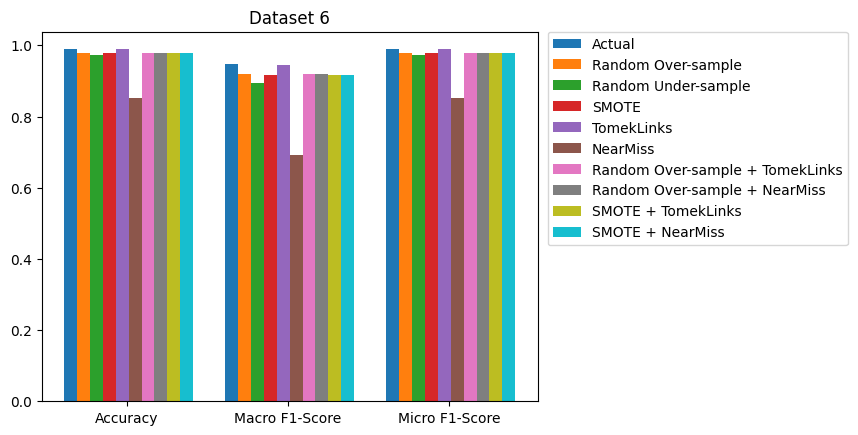

In [24]:
A1 = []
B1 = []
C1 = []
D1 = []
E1 = []
F1 = []
G1 = []
H1 = []
I1 = []
J1 = []
X = ['Accuracy','Macro F1-Score','Micro F1-Score']
X_axis = np.arange(len(X))
for i in range(3):
    k=0
    for j in range(i,len(A),3):
        k+=(A[j]/5)
    A1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(B),3):
        k+=(B[j]/5)
    B1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(C),3):
        k+=(C[j]/5)
    C1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(D),3):
        k+=(D[j]/5)
    D1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(E),3):
        k+=(E[j]/5)
    E1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(F),3):
        k+=(F[j]/5)
    F1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(G),3):
        k+=(G[j]/5)
    G1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(H),3):
        k+=(H[j]/5)
    H1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(I),3):
        k+=(I[j]/5)
    I1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(J),3):
        k+=(J[j]/5)
    J1+=[k]
     
plt.bar(X_axis, A1, 0.08, label = 'Actual')
plt.bar(X_axis+0.08 , B1, 0.08, label = 'Random Over-sample')
plt.bar(X_axis + 0.16, C1, 0.08, label = 'Random Under-sample')
plt.bar(X_axis + 0.24, D1, 0.08, label = 'SMOTE')
plt.bar(X_axis+0.32, E1, 0.08, label = 'TomekLinks')
plt.bar(X_axis+0.40 , F1, 0.08, label = 'NearMiss')
plt.bar(X_axis + 0.48, G1, 0.08, label = 'Random Over-sample + TomekLinks')
plt.bar(X_axis + 0.56, H1, 0.08, label = 'Random Over-sample + NearMiss')
plt.bar(X_axis + 0.64, I1, 0.08, label = 'SMOTE + TomekLinks')
plt.bar(X_axis + 0.72, J1, 0.08, label = 'SMOTE + NearMiss')

plt.xticks(X_axis+0.35, X)
plt.title("Dataset 6")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()